# Workshop 1: Introduction to Data Science & EEG Analysis
*Abhinav Pottabathula and Saarang Panchavati*

Hello NT@B members! Welcome to an introductory workshop on data science and EEG analysis.

Agenda:
- Intro to Jupyter
- Acquiring Raw EEG Data with Muse
- Data Acquisition
- Visualization
- Take a look at EEG Data!

***

## Intro to Jupyter 
Welcome to Jupyter Notebook! Let's get you familiarized with Jupyter. If you're already familiar with the Jupyter environment you can move on to the next section.

Jupyter is really cool because you can execute your code in _cells_ instead of all at once. This is extremely useful for data science because you can iterate through different methods of analysis without having to run all your code at once. 

By default, you are in *command* mode in command mode, you can do the following:
1. Change a cells _type_: (code, markdown or raw). The type of this cell is markdown, where you can write stuff and make it look pretty
2. Add and Delete Cells
3. Run Cells

To re-enter *command* mode, just press `esc` on your keyboard.

Here are the most useful keyboard shortcuts:
1. `shift + enter` runs a cell
2. `a`,`b` adds a cell above and below the current one, respectively
3. `y` changes a cell to code type
4. `m` changes as cell to markdown type
5. `d+d` deletes the selected cell
6. `z+z` is undo
7. `i+i` interrupts the notebook (in case you have an infinite loop or something)

 

Some things to remember:
1. The number next to a cell is the order in which it was run, if there's a star there then that means it is still running. 
2. Jupyter saves variables even if you delete the cell, so if you want to re-run your notebook or run a cell, make sure you're aware of what the variables are set to!
3. Be sure to stay organized in your notebook — it can become very hard to find cells or portions of your code if you don't organize your code in a nice way

### Convert this markdown cell into a code cell and run it with shift enter!
print("Hello World!")

In [29]:
#Run this cell, and then interrupt it with ii (interrupt quickly or you might need to restart jupyter!)
while True:
    continue

KeyboardInterrupt: 

## Let's Collect Raw EEG Data!
All we need to do is visit the link below and press "Connect". This initiates the pairing process with our Muse 2016 headset. Once we have paired we can see raw EEG data coming from each of the 4 channels on the headset, and can easily download our recordings at the bottom of the page!

https://muse-eeg-app.firebaseapp.com/

## Intro to Pandas

Pandas is one of the most popular python libraries for datascience! It is really important to be familiar with it and understand how to use it. Let's dive in!
### Don't worry about the cell below, it gets a dataset from the internet about baby names in different states.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline
import os


def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]
ca = baby_names[baby_names['State'] == 'CA']

Using cached version downloaded at Wed Nov  6 14:12:54 2019


## Looking at Data

The table we have collected is called "ca"

In [31]:
#Running this cell will show the entire "ca" dataframe
ca

,State,Sex,Year,Name,Count
379228,CA,F,1910,Mary,295
379229,CA,F,1910,Helen,239
379230,CA,F,1910,Dorothy,220
379231,CA,F,1910,Margaret,163
379232,CA,F,1910,Frances,134
379233,CA,F,1910,Ruth,128
379234,CA,F,1910,Evelyn,126
379235,CA,F,1910,Alice,118
379236,CA,F,1910,Virginia,101
379237,CA,F,1910,Elizabeth,93


We can run ca.head(), to only list the first 5 entries in the table, so it's easier to see

In [32]:
#List the first 5 entries of the ca table below:


To select a column within the dataframe index into it with df["col_name"], for the "Year" column in the ca table it would be ca["Year"]

In [33]:
#List the first 5 entries of the "Year" column in the ca table:


To get useful statistics on the data call df.describe()

In [34]:
# Describe the first 5 entries of the ca dataframe:


To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. Count the number of different names for each Year in `CA` (California).  (You may use the `ca` DataFrame created above.)

**Note:** *We are not computing the number of babies but instead the number of names (rows in the table) for each year.*

In [35]:
num_of_names_per_year = ...
num_of_names_per_year[:5]

TypeError: 'ellipsis' object is not subscriptable

Count the number of different names for each gender in `CA`.

In [ ]:
num_of_names_per_gender = ...
num_of_names_per_gender

### Extra Practice
We have showed you guys how to get your data into a python notebook. We have only barely scratched the surface of manipulating data, and there are a lot of things to learn that we won't have time to go over today. If you are inclined, below are some very important functions that you should look into and try out!
- df = pd.read_csv("file_name") Reads in a file from the same folder directory as this notebook
- The [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function in Pandas groups columns and rows together and allows you to compute operations on these groups like sums, averages, and your own custom functions
- Look through this page:
https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

***

## Data Visualization

### Matplotlib

matplotlib is the industry standard for plotting and data visualization, it is the engine that drives most data visualization libraries. Read the documentation [here](https://matplotlib.org/3.1.1/users/index.html)

In [ ]:
#lets make some data
x = np.linspace(1,100,1000) #generates 1000 points between 1 and 100
y = np.sin(x)

#now lets plot it! Look how easy it is
plt.plot(x,y); #plots x against y, as a line graph

In [ ]:
mpg = sns.load_dataset('mpg') #load a miles per gallon dataset in pandas
mpg.head()

Now you try! In the cell below, try plotting mpg vs horsepower using the above syntax! Notice that a linegraph doesn't really make much sense, and doesn't really give us a good sense of the data. 

Instead, we can change the code to `plt.scatter`. Try it in the cell below! Look how nice it looks now! We can really see some sort of trend in the data. 

Another useful function in matlab is the `hist` function. We can use it to explore distributions in the data for columns we choose. In the cell below, see what you can find about the distribution of horsepower in our dataset! Which way is the data skewed?

Now lets quickly look at some pandas stuff!

In [ ]:
#Lets explore how the mean mpg changed over the years

#first we group our dataframe by years, and find the means (the agg function to use is np.mean)
grouped = #FILL ME! Hint: df.groupby("col_name").mean()
plt.plot(grouped);

#we can add a title and some labels easily
plt.title('model_year vs. mpg')
plt.ylabel('mpg')
plt.xlabel('year');

Matplotlib has a lot of other functionality! I'll briefly zoom over it in the cell next couple of cells below, but we won't spend too much time on it — it is fairly intuitive

In [ ]:
#plot multiple graphs on top of each other!
#Say we want to compare how the mpg of US cars has changed over the years to how the mpg of European cars has changed

#if you have any questions about the pandas stuff I do, let me know!
usdf = mpg[mpg['origin'] == 'usa'].groupby('model_year').agg(np.mean)['mpg']
eudf = mpg[mpg['origin'] == 'europe'].groupby('model_year').agg(np.mean)['mpg']

#all we need to do is just stack the plot commands, and add a label how nifty! 

#also you can change colors
plt.plot(usdf,'r',label = 'USA')
plt.plot(eudf,'g',label = 'Europe')

#also we can make them look like xkcd comics lol
plt.xkcd()

plt.title('model_year vs. mpg by country')
plt.legend(); #this shows the legend;

In [ ]:
#Finally, matplot can be used to graph subplots like such 

x = np.linspace(0,2*np.pi,400)
y = np.sin(x)

fig, axs = plt.subplots(2,sharex = True) #we make them share the x axis
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);

In [ ]:
#Subplots in 2 directions 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex = True, sharey = True)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

***

### Seaborn

Seaborn is an extremely powerful library built on top of matplotlib, and is extremeley useful for data visualization and is much *much* prettier than matplotlib. 

Lets continue with some examples from the mpg dataset and compare them to seaborn

In [ ]:
plt.rcdefaults()  #get rid of xkcd

#As a reminder, here's the scatterplot with matplotlib
plt.scatter(mpg['horsepower'],mpg['mpg']);

In [ ]:
#Now lets see how nice this looks with seaborn
sns.relplot(x = 'horsepower',y = 'mpg',data = mpg)  
sns.relplot(x = 'horsepower',y = 'mpg',data = mpg, kind = 'line')  #the line parmeter changes it to a lineplot with confidence interval!
#notice that already it looks cleaner, and the syntax is much nicer and intuitive

In [ ]:
#Now watch what else we can add to this with seaborn!
sns.scatterplot(x = 'horsepower',y = 'mpg',data = mpg, hue = 'origin', size = 'weight') 
#seaborn automatically classifies the data! WOW! 


In [ ]:
#use this cell to play around more with the data and generate some dope plots




In [ ]:
#Seaborn can even do pandas fucntions too like aggregating and groupby
titanic = sns.load_dataset("titanic")  
titanic.head()

In [ ]:
g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count")  

Hopefully that was a good overview of seaborn, of course if you have any questions always ask. You can look into all of the seaborn functions [here](https://www.c-sharpcorner.com/article/a-complete-python-seaborn-tutorial/)

***

# Now let's look at some EEG Data!!
## N170 - Face Recognition

<img style="height: 300px; float: right" src="https://www.researchgate.net/profile/Vincent_Walsh3/publication/49833438/figure/fig1/AS:394279194251295@1471014893499/The-P1-and-N170-ERP-components-The-graph-shows-the-grand-average-ERP-responses-from-ten.png"/>

The N170 is a large negative event-related potential (ERP) component that occurs after the detection of faces, but not objects, scrambled faces, or other body parts such as hands. The N170 occurs around 170ms after face perception and is most easily detected at lateral posterior electrodes such as T5 and T6 [1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.601.6917&rep=rep1&type=pdf). Frontal or profile views of human (and animal [2](https://www.ncbi.nlm.nih.gov/pubmed/14995895)) faces elicit the strongest N170 and the strength of the N170 does not seem to be influenced by how familiar a face is. Thus, although there is no consensus on the specific source of the N170, researchers believe it is related to activity in the fusiform face area, an area of the brain that shows a similar response pattern and is involved in encoding the holistic representation of a face (i.e eyes, nose mouth all arranged in the appropriate way).

In this notebook, we will attempt to detect the N170 with the Muse headband using faces and houses as our stimuli. The Muse's temporal electrodes (TP9 and TP10) are well positioned to detect the N170 and we expect we'll be able to see an N170 emerge from just a few dozen trials. We will then run several different classification algorithms on our data in order to evaluate the performance of a potential brain-computer interface using the N170.

## Step 1: Prepare the Data for Analysis
 
Since last week we learned how to acquire and clean data, we will begin where we left off and start analyzing data. There is a folder under Workshop 2 called N170, and it contains sample data which we will be analyzing.

### Load data into MNE objects

[MNE](https://martinos.org/mne/stable/index.html) is a very powerful Python library for analyzing EEG data. It provides helpful functions for performing key tasks such as filtering EEG data, rejecting artifacts, and grouping EEG data into chunks (epochs).

The first step to using MNE is to read the data we've collected into an MNE `Raw` object

In [44]:
from multiprocessing import Process
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
# from stimulus_presentation import n170
from utils import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# Define these parameters 
duration = 120 # in seconds. 120 is recommended
subject = 1 # unique id for each participant
session = 1 # represents a data collection session. Multiple trials can be performed for each session

raw = utils.load_data('/N170', sfreq=256., subject_nb=subject, session_nb=session)

Data Path:./data/N170/subject1/session1/*.csv
fnames: ['./data/N170/subject1/session1/data_2017-09-13-15.45.08.csv', './data/N170/subject1/session1/data_2017-09-13-15.40.17.csv', './data/N170/subject1/session1/data_2017-09-13-15.32.50.csv', './data/N170/subject1/session1/data_2017-09-13-15.30.01.csv', './data/N170/subject1/session1/data_2017-09-13-15.35.26.csv', './data/N170/subject1/session1/data_2017-09-13-15.42.33.csv']
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=30

### Visualizing the Power Spectrum

Plotting the power spectral density (PSD) of our dataset will give us a glimpse at the different frequencies that are present. We won't be able to see the N170 in the PSD, but it will give us an impression of how noisy our data was. A very noisy or flat PSD may represent poor signal quality at certain electrodes



Effective window size : 8.000 (s)


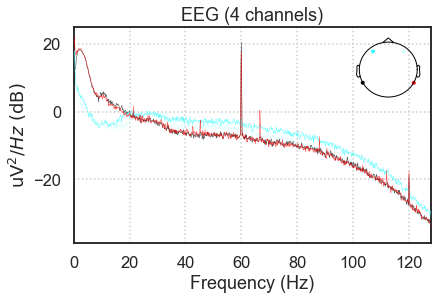

In [45]:
%matplotlib inline
raw.plot_psd();

This PSD looks good. There is a large peak at 60hz, representing background electrical activity.

### Filtering

Most ERP components are composed of lower frequency fluctuations in the EEG signal. Thus, we can filter out all frequencies between 1 and 30 hz in order to increase our ability to detect them.

Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Effective window size : 8.000 (s)


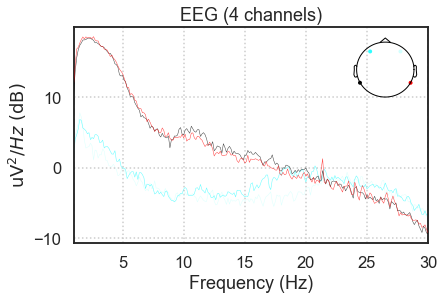

In [46]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

This PSD of frequencies between 1 and 30 hz looks good. The difference between the temporal channels (red and black) and the frontal channels (blue and green) is clearly evident. The huge peak from 1 to 3hz is largely due to the presence of eye blinks, which produce large amplitude, low-frequency events in the EEG.

### Epoching

Next, we will chunk (epoch) the data into segments representing the data 100ms before to 800ms after each stimulus. No baseline correction is needed (signal is bandpass filtered) and we will reject every epoch where the amplitude of the signal exceeded 75 uV, which should most eye blinks.

In [47]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

1174 events found
Event IDs: [1 2]
sample drop %:  4.003407155025551


<Epochs  |   1127 events (all good), -0.101562 - 0.800781 sec, baseline off, ~8.0 MB, data loaded,
 'Face': 562
 'House': 565>

Sample drop % is an important metric representing how noisy our data set was. If this is greater than 20%, consider ensuring that signal variances is very low in the raw EEG viewer and collecting more data

## Step 5: Analyze the Data

Finally, we can now analyze our results by averaging the epochs that occured during the different stimuli and looking for differences in the waveform


### Epoch average

With our `plot_conditions` utility function, we can plot the average ERP for all electrodes for both conditions:

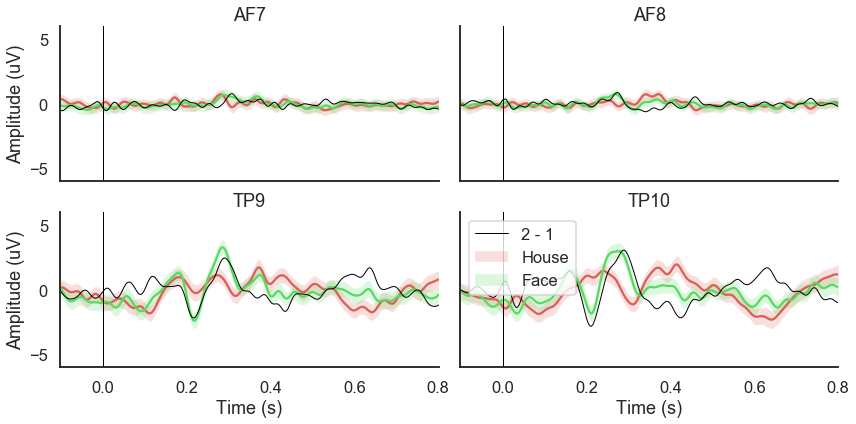

In [48]:
%matplotlib inline
conditions = OrderedDict()
conditions['House'] = [1]
conditions['Face'] = [2]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

Here we have a very nice deflection in the temporal channels around 200ms for face stimuli. This is likely the N170, although appearing slightly later due to delay in receiving the data over bluetooth. 

There's not much to see in the frontal channels (AF7 and AF8), but that's to be expected based on the fact that the N170 is mostly a lateral posterior brain phenomenon

### Decoding the N170

Next, we will use 4 different machine learning pipelines to classify the N170 based on the data we collected. The 

- **Vect + LR** :  Vectorization of the trial + Logistic Regression. This can be considered the standard decoding pipeline for MEG / EEG.
- **Vect + RegLDA** :  Vectorization of the trial + Regularized LDA. This one is very commonly used in P300 BCIs. It can outperform the previous one but become unusable if the number of dimension is too high.
- **ERPCov + TS**: ErpCovariance + Tangent space mapping. One of the most reliable Riemannian geometry-based pipeline.
- **ERPCov + MDM**: ErpCovariance + MDM. A very simple, yet effective (for low channel count), Riemannian geometry classifier.

Evaluation is done through cross-validation, with area-under-the-curve (AUC) as metric (AUC is probably the best metric for binary and unbalanced classification problem)

*Note: because we're doing machine learning here, the following cell may take a while to complete*

In [49]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from mne.decoding import Vectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

from pyriemann.estimation import ERPCovariances, XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

from collections import OrderedDict

clfs = OrderedDict()

clfs['Vect + LR'] = make_pipeline(Vectorizer(), StandardScaler(), LogisticRegression())
clfs['Vect + RegLDA'] = make_pipeline(Vectorizer(), LDA(shrinkage='auto', solver='eigen'))
clfs['ERPCov + TS'] = make_pipeline(ERPCovariances(estimator='oas'), TangentSpace(), LogisticRegression())
clfs['ERPCov + MDM'] = make_pipeline(ERPCovariances(estimator='oas'), MDM())
clfs['XdawnCov + TS'] = make_pipeline(XdawnCovariances(estimator='oas'), TangentSpace(), LogisticRegression())
clfs['XdawnCov + MDM'] = make_pipeline(XdawnCovariances(estimator='oas'), MDM())

# format data
epochs.pick_types(eeg=True)
X = epochs.get_data() * 1e6
times = epochs.times
y = epochs.events[:, -1]

# define cross validation 
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, 
                            random_state=42)

# run cross validation for each pipeline
auc = []
methods = []
for m in clfs:
    print(m)
    try:
        
        res = cross_val_score(clfs[m], X, y==2, scoring='roc_auc', 
                              cv=cv, n_jobs=-1)
        auc.extend(res)
        methods.extend([m]*len(res))
    except:
        pass

Vect + LR


/Users/apottaba/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Vect + RegLDA
ERPCov + TS
ERPCov + MDM
XdawnCov + TS
XdawnCov + MDM


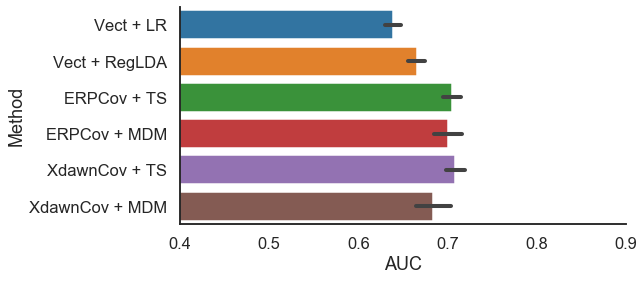

In [50]:
## Plot Decoding Results

import seaborn as sns
from matplotlib import pyplot as plt

    
results = pd.DataFrame(data=auc, columns=['AUC'])
results['Method'] = methods

fig = plt.figure(figsize=[8,4])
sns.barplot(data=results, x='AUC', y='Method')
plt.xlim(0.4, 0.9)
sns.despine()

The best classifiers for this data set appear to be the ERPCov and XdawnCov with tangent space projection pipelines. AUC is around .7, which is good, but on the low end for being able to run a brain-computer interface.

## Extra Extra Practice

The best way to learn how to data science is by doing a bunch of practice!

- Click [this](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) link and complete the quick tutorial.

- Check out this publicly available dataset and figure out how to parse it! Go to http://www.mindbigdata.com/opendb/  and download the MindBigData-MU-v1.0.zip